<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/bigcon/blob/master/Code_Merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from scipy import stats
import math

In [10]:
original = pd.read_excel('./performance.xlsx', header=1)
original['날짜'] = pd.to_datetime(original['방송일시']).dt.date
original = original[original['상품군']!='무형']

In [3]:
train = pd.read_excel('./train.xlsx')
train = train[train['판매단가'] < train['취급액']]

In [4]:
train['노출(분)'] = train['노출(분)'].replace(0, math.nan)
train['노출(분)'] = train['노출(분)'].fillna(method='ffill')

In [8]:
total = pd.read_excel('./performance.xlsx', header=1)
total = total[total['상품군']!='무형'] 
total = total[total['판매단가'] < total['취급액']]
total['날짜'] = pd.to_datetime(total['방송일시']).dt.date
total['날짜'] = pd.to_datetime(total['날짜'])
total['주문량'] = total['취급액']/total['판매단가']
total["요일"]=total["방송일시"].dt.dayofweek # 요일
total["시"]=total["방송일시"].dt.hour # 시
total['월'] = total['방송일시'].dt.month # 월

In [101]:
data = pd.read_excel('./performance.xlsx', header=1)
data = data[data['상품군']!='무형'] 
data = data[data['판매단가'] < data['취급액']]
data['날짜'] = pd.to_datetime(data['방송일시']).dt.date
data['날짜'] = pd.to_datetime(data['날짜'])
data['주문량'] = data['취급액']/data['판매단가']
data["요일"]=data["방송일시"].dt.dayofweek # 요일
data["시"]=data["방송일시"].dt.hour # 시
data['월'] = data['방송일시'].dt.month # 월
weekday = {"월":0,"화":1,"수":2,"목":3,"금":4,"토":5,"일":6}

In [102]:
data = data.fillna(method='ffill')

In [103]:
data = data.iloc[17604:25792]

In [16]:
test = pd.read_excel('./test.xlsx', header=1)

In [17]:
total['계절'] = 0

In [18]:
for i in total.index:
    if 3 <= total['월'][i] <= 5:
        total['계절'][i] = 1
    elif 6 <= total['월'][i] <= 8:
        total['계절'][i] = 2
    elif 9 <= total['월'][i] <= 11:
        total['계절'][i] = 3
    else:
        total['계절'][i] = 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ""

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text

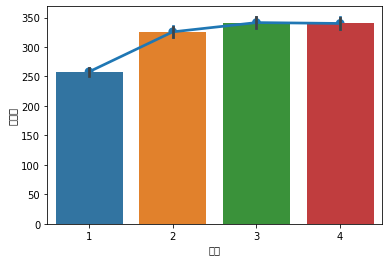

In [69]:
#계절별 주문량 그래프 3(가을)에 제일 많고 1(봄)에 제일 적다.
sns.pointplot(data=total,x="계절",y="주문량") 
sns.barplot(data=total,x="계절",y="주문량")

In [70]:
data.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,주문량,요일,시,월
17373,2019-06-15 00:00:00,20.0,100305,200981,오모떼 미라클쉐이핑 브라팬티 시즌3,속옷,119000,16517000,2019-06-15,138.798319,5,0,6
17374,2019-06-15 00:20:00,20.0,100305,200981,오모떼 미라클쉐이핑 브라팬티 시즌3,속옷,119000,44829000,2019-06-15,376.714286,5,0,6
17375,2019-06-15 00:40:00,20.0,100305,200981,오모떼 미라클쉐이핑 브라팬티 시즌3,속옷,119000,56057000,2019-06-15,471.067227,5,0,6
17376,2019-06-15 01:00:00,30.0,100374,201202,USPA 남성 폴로셔츠 위켄드 컬렉션 3종,의류,69000,9996000,2019-06-15,144.869565,5,1,6
17377,2019-06-15 01:00:00,30.0,100374,201206,USPA 여성 폴로셔츠 위켄드 컬렉션 3종,의류,69000,9409000,2019-06-15,136.362319,5,1,6


#날씨

In [73]:

# 대표 지역들
places = ["강릉","광주","부산","수원","울산","대구","대전","서울","파주"] 
weather = pd.read_excel("/content/drive/My Drive/빅콘폴더/날씨_실제/강릉날씨.xlsx")
row_num = weather.shape[0]
weather["지역"]=["강릉"]*row_num

In [156]:
# 모든 지역 날씨 데이터 세로로 합치기
for p in places[1:]:
    a=pd.read_excel(f"/content/sample_data/날씨_실제/{p}날씨.xlsx")
    a["지역"]=[p]*row_num
    weather = pd.concat([weather, a], axis=0)

In [157]:
# "-" -> 0값으로 변경
weather["강수량(mm)"]=weather["강수량(mm)"].replace("-",0)
weather["신적설(cm)"]=weather["신적설(cm)"].replace("-",0)
weather["운량(1/10)"]=weather["운량(1/10)"].replace("-",0)

# object 형 float 형으로 변경
weather["강수량(mm)"]=weather["강수량(mm)"].astype(float)
weather["신적설(cm)"]=weather["신적설(cm)"].astype(float)
weather["운량(1/10)"]=weather["운량(1/10)"].astype(float)

In [158]:
weather = weather.reset_index()

In [159]:
# 날짜 set 맞추기
new_weather = pd.DataFrame()
new_weather = weather.iloc[165:243]
new_weather = pd.concat([new_weather, weather.iloc[753:831]])
new_weather = pd.concat([new_weather, weather.iloc[1341:1419]])
new_weather = pd.concat([new_weather, weather.iloc[1929:2007]])
new_weather = pd.concat([new_weather, weather.iloc[2517:2595]])
new_weather = pd.concat([new_weather, weather.iloc[3105:3183]])
new_weather = pd.concat([new_weather, weather.iloc[3693:3771]])
new_weather = pd.concat([new_weather, weather.iloc[4281:4359]])
new_weather = pd.concat([new_weather, weather.iloc[4869:4947]])

In [160]:
# 서울 날씨와 강릉, 부산 날씨로 칼럼별 주문량 상관성 확인 및 지역별 날씨의 영향도 확인
gang_weather = new_weather.loc[new_weather["지역"]=="강릉",:]
seoul_weather = new_weather.loc[new_weather["지역"]=="서울",:]
busan_weather = new_weather.loc[new_weather["지역"]=="부산",:]
suwon_weather = new_weather.loc[new_weather["지역"]=="수원",:]
sudogwon_weather = new_weather.loc[(new_weather["지역"]=="서울")|(weather["지역"]=="수원"),:]

In [161]:
day_data = data.copy()

In [162]:
day_data['날짜'] = pd.to_datetime(day_data['날짜'])
new_weather['날짜'] = pd.to_datetime(new_weather['날짜'])

In [163]:
all_data = day_data.merge(new_weather, on='날짜')
all_data = all_data.groupby(['날짜']).mean()

In [ ]:
sudogwon_weather['날짜'] = pd.to_datetime(sudogwon_weather['날짜'] )
seoul_weather['날짜'] = pd.to_datetime(seoul_weather['날짜'] )
busan_weather['날짜'] =pd.to_datetime(busan_weather['날짜'] )
suwon_weather['날짜'] = pd.to_datetime(suwon_weather['날짜'] )
gang_weather['날짜'] = pd.to_datetime(gang_weather['날짜'])

In [165]:
sudogwon_data = day_data.merge(sudogwon_weather, on="날짜")
suwon_data = day_data.merge(suwon_weather, on="날짜")
seoul_data = day_data.merge(seoul_weather, on="날짜")
busan_data = day_data.merge(busan_weather, on="날짜")
gang_data = day_data.merge(gang_weather, on="날짜")

In [166]:
# 시각화를 용이하게 하기 위한 데이터 전처리 함수
def preprocessing(data, bins=4):
    # 강수유무, 눈유무는 0,1 로 -> 비가오거나 눈이 쌓이면 1, 비가 오지 않거나 눈이 쌓이지 않으면 0
    data["강수유무"]=True
    data.loc[data["강수량(mm)"]!=0,"강수유무"]=1
    data.loc[data["강수량(mm)"]==0,"강수유무"]=0

    data["눈유무"]=True
    data.loc[data["신적설(cm)"]!=0,"눈유무"]=1
    data.loc[data["신적설(cm)"]==0,"눈유무"]=0

    # 나머지 칼럼은 6구간으로 나누기
    cate_columns= ["평균기온","최고기온","최저기온",'평균풍속(m/s)','평균습도(%)', '운량(1/10)', '일조시간(Hr)',"강수량(mm)","신적설(cm)"]
    
    for col in cate_columns:
        data[col]=pd.cut(data[col],bins)

In [167]:

# 데이터 전처리
for d in [all_data, seoul_data, busan_data, gang_data, sudogwon_data]:
    preprocessing(d,4)

In [168]:
# 시각화
visual_columns = all_data.columns[9:] # 시각화를 원하는 칼럼
visual_columns

Index(['index', '평균기온', '최고기온', '최저기온', '강수량(mm)', '신적설(cm)', '평균풍속(m/s)',
       '평균습도(%)', '운량(1/10)', '일조시간(Hr)', '강수유무', '눈유무'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text

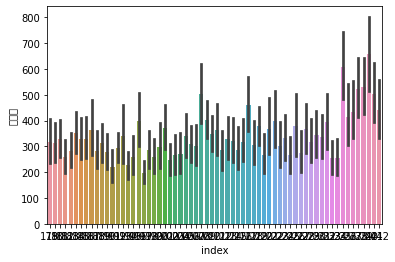

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_te

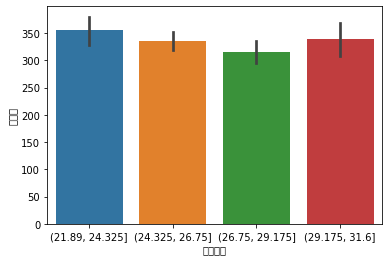

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0, flags=flags)


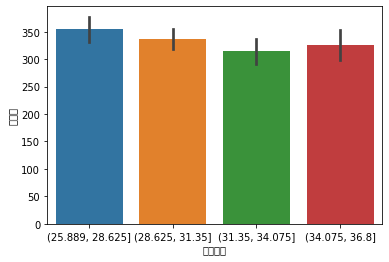

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)


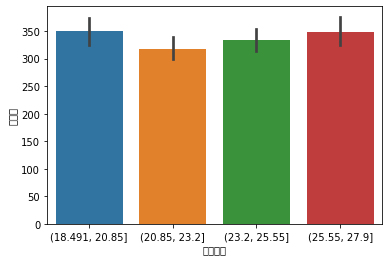

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


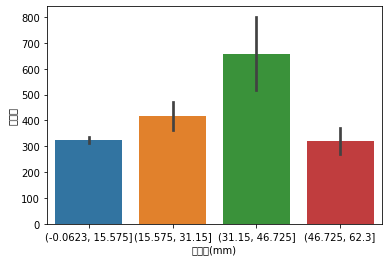

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text

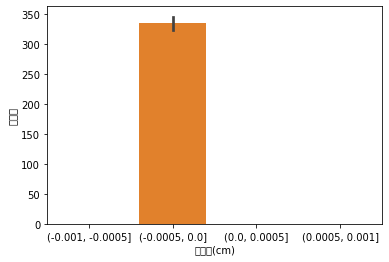

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0, flags=flags)


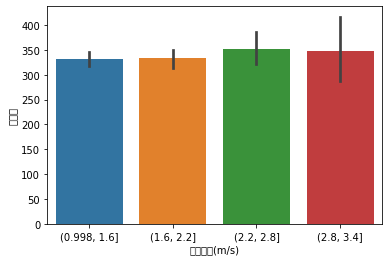

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


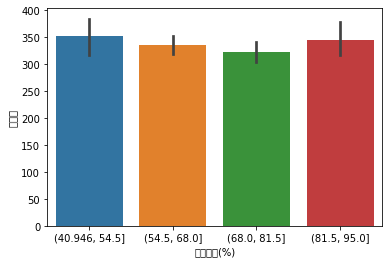

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0, flags=flags)


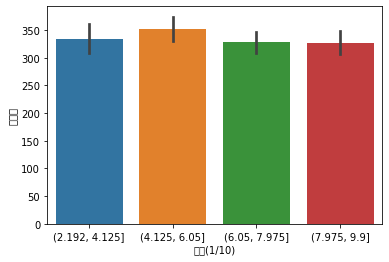

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_te

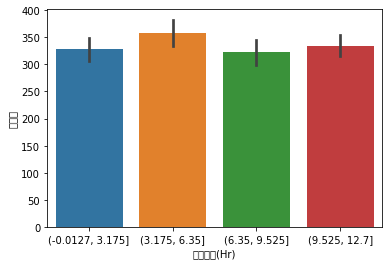

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0, flags=flags)


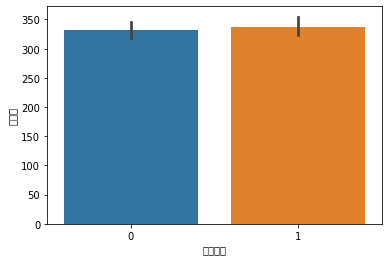

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45576 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45576 missing from current font.
  font.set_text(s, 0, flags=flags)


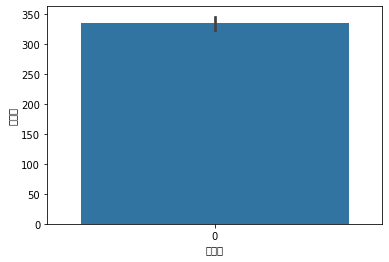

In [169]:
for col in visual_columns:
    sns.barplot(x=col, y="주문량", data=seoul_data)
    #plt.savefig(f'./날씨그래프/{col[:4]}.png') # 그래프 저장
    plt.show()

In [ ]:
'''
# 요일성을 제거하고 특정 월에 대해서만 시각화
seoul_data["월"]=pd.to_datetime(seoul_data["방송일시"]).dt.month
a = seoul_data.loc[((seoul_data["요일"]!=5)&(seoul_data["요일"]!=6))&(seoul_data["월"]==7),:]
a["범주_습도"]=pd.cut(a["평균습도(%)"],4)
sns.barplot(x="범주_습도", y="주문량", data=a)
'''

In [170]:
display(seoul_data.iloc[:,9:12].corr())
display(busan_data.iloc[:,9:12].corr())
display(gang_data.iloc[:,9:12].corr())

,주문량,요일,시
주문량,1.000000,0.017263,-0.098928
요일,0.017263,1.000000,-0.021874
시,-0.098928,-0.021874,1.000000


,주문량,요일,시
주문량,1.000000,0.017263,-0.098928
요일,0.017263,1.000000,-0.021874
시,-0.098928,-0.021874,1.000000


,주문량,요일,시
주문량,1.000000,0.017263,-0.098928
요일,0.017263,1.000000,-0.021874
시,-0.098928,-0.021874,1.000000


In [171]:
# 범주 시각화 함수
def visual(col):
    global a
    # 토,일 제외함으로써 요일성 제외
    a = train_1.loc[(train_1["요일"]!=5)&(train_1["요일"]!=6),:] 
    # 연속형 데이터를 범주형으로 변경
    a[f"범주_{col}"]=pd.cut(a[col],3) 
    sns.barplot(x=f"범주_{col}",y="주문량", data=a)
    plt.show()

In [179]:
fc_prop = pd.read_csv("/날씨예보/서울날씨/강수확률.csv")
fc_amount = pd.read_csv("/날씨예보/서울날씨/6시간 강수량.csv") 
fc_sky = pd.read_csv("/날씨예보/서울날씨/하늘상태.csv")
fc_top = pd.read_csv("/날씨예보/서울날씨/일최고기온.csv")
fc_bottom = pd.read_csv("/날씨예보/서울날씨/일최저기온.csv")

In [180]:
forecast_data = {"강수확률":fc_prop, "강수량":fc_amount,"하늘상태":fc_sky, "일최고기온":fc_top, "일최저기온":fc_bottom}

In [182]:
forecast = pd.DataFrame()

for name, fcdata in forecast_data.items():
    amount_list=[]
    cycle = (fcdata.shape[0])//365 # 하루 관측량
    for i in range(365):
        day_weather = fcdata.iloc[i*cycle:(i+1)*cycle,-1].mean()
        amount_list.append(day_weather)
    forecast[name]=amount_list

In [183]:
forecast = forecast.iloc[165:243]

In [184]:
# 날짜 칼럼 추가
forecast["날짜"]=train["날짜"].unique()

In [185]:
train_1 = data.copy()
train_1 = train_1.merge(forecast, on='날짜')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from cu

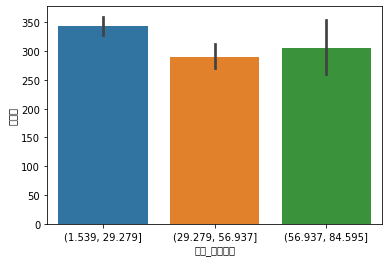

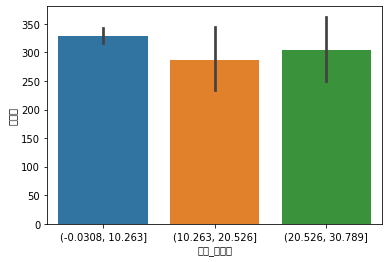

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45720 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45720 missing from current font.
  font.set_te

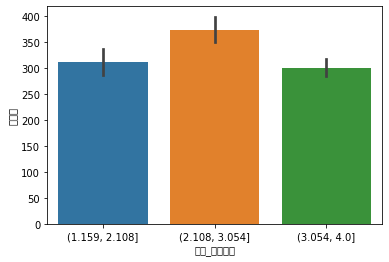

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

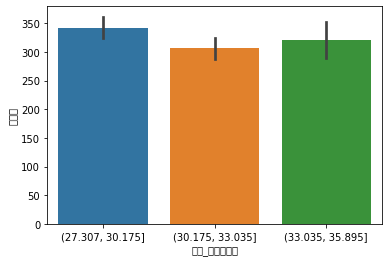

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)


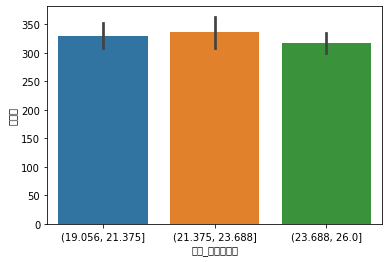

In [186]:
for name in forecast_data.keys():
    visual(name)

#미세먼지

In [88]:
munji = pd.read_excel('/content/2019미세먼지.xlsx')
pop_tot = pd.read_excel('/2019총인구비율(수정).xlsx')
pop_w = pd.read_excel('/content/2019여성인구비율.xlsx')
pop_m = pd.read_excel('/content/2019남성인구비율.xlsx')

In [ ]:
MonthItemGroup = train.groupby(['상품군','월']).mean()
MonthItemGroup

In [105]:
categories = MonthItemGroup.index.get_level_values(0).unique()
categories

Index(['beauty', 'bedding', 'cloth', 'elec', 'etc', 'food', 'furniture',
       'health', 'inner', 'life', 'living'],
      dtype='object', name='상품군')

In [107]:
for i in categories:
  globals()['month_{}'.format(i)] = MonthItemGroup.xs(i)['주문량']
month_beauty

월
6    734.573814
7    782.083530
8    490.864757
Name: 주문량, dtype: float64

In [110]:
def weighted_munji(munji_data,population_data): 
    weighted_df = pd.DataFrame()
    weighted_df = pd.DataFrame().reindex_like(munji_data)
    for i in range(len(munji_data.index)):
        for j in range(len(munji_data.columns)):
            weighted_df.iloc[i][j] = munji_data.iloc[i][j]*population_data.iloc[i][j]
    return weighted_df

In [109]:

#모든 카테고리와의 상관계수 결과 반환해줌
def cor_with_categories(data): 
    results = []
    results.append(stats.linregress(month_bedding,data.iloc[month_bedding.index-1]))
    results.append(stats.linregress(month_furniture,data.iloc[month_furniture.index-1]))
    results.append(stats.linregress(month_health,data.iloc[month_health.index-1]))
    results.append(stats.linregress(month_food,data.iloc[month_food.index-1]))
    results.append(stats.linregress(month_life,data.iloc[month_life.index-1]))
    results.append(stats.linregress(month_inner,data.iloc[month_inner.index-1]))
    results.append(stats.linregress(month_cloth,data.iloc[month_cloth.index-1]))
    results.append(stats.linregress(month_beauty,data.iloc[month_beauty.index-1]))
    results.append(stats.linregress(month_etc,data.iloc[month_etc.index-1]))
    results.append(stats.linregress(month_living,data.iloc[month_living.index-1]))
    print('침구,가구,건강기능,농수축,생활용품,속옷,의류,이미용,잡화,주방')
    
    return results

In [111]:
munji_df = munji.set_index('지역날짜')
pop_tot_df = pop_tot.set_index('행정구역(시군구)별')

In [112]:
tot_weight_munji = weighted_munji(munji_df, pop_tot_df)

In [113]:
tot_munji_df = tot_weight_munji.sum()
tot_munji_df

2019. 01    24.837347
2019. 02    22.833675
2019. 03    27.869383
2019. 04    13.450065
2019. 05    18.012409
2019. 06    12.980445
2019. 07    11.941034
2019. 08    11.264766
2019. 09     8.645412
2019. 10    10.491966
2019. 11    13.959968
2019. 12    18.588743
dtype: float64

In [176]:
# 봄(3,4,5)월엔 상관계수가 높지만 train기간인 6,7,8월은 낮다.
stats.linregress(tot_munji_df[2:5], MonthItemGroup.xs('health')['주문량'])

LinregressResult(slope=5.395970481258863, intercept=270.4579752494558, rvalue=0.42373746610642643, pvalue=0.7214358303523076, stderr=11.53447545258167)

In [116]:
# 6,7,8 월만 전체인구수가중한것과 건강기능 상관계수
stats.linregress(tot_munji_df[5:8], MonthItemGroup.xs('health')['주문량'])

LinregressResult(slope=99.30943820204276, intercept=-820.7029264126979, rvalue=0.9144962032725028, pvalue=0.26517464159491627, stderr=43.93681513571076)

In [124]:
pop_w_df = pop_w.set_index('행정구역(시군구)별')

In [125]:
woman_weight_munji = weighted_munji(munji_df, pop_w_df)

In [126]:
woman_munji_df = woman_weight_munji.sum()
woman_munji_df

2019. 01    12.484569
2019. 02    11.481677
2019. 03    14.014574
2019. 04     6.766506
2019. 05     9.061288
2019. 06     6.532986
2019. 07     6.008642
2019. 08     5.665599
2019. 09     4.347492
2019. 10     5.275934
2019. 11     7.020567
2019. 12     9.352337
dtype: float64

In [127]:
stats.linregress(woman_munji_df[5:8], MonthItemGroup.xs('health')['주문량'])

LinregressResult(slope=196.5989557714752, intercept=-815.9983069564603, rvalue=0.915102904851042, pvalue=0.2642183874640637, stderr=86.62709397289866)

In [131]:
pop_m_df = pop_m.set_index('행정구역(시군구)별')

In [132]:
mix_weight_munji = 0.2*weighted_munji(munji_df, pop_m_df) +\
                    0.8*weighted_munji(munji_df, pop_w_df)

In [133]:
mix_munji_df = mix_weight_munji.sum()
mix_munji_df

2019. 01    12.458211
2019. 02    11.455741
2019. 03    13.982621
2019. 04     6.749916
2019. 05     9.039254
2019. 06     6.515881
2019. 07     5.993392
2019. 08     5.652313
2019. 09     4.337577
2019. 10     5.263954
2019. 11     7.004334
2019. 12     9.329150
dtype: float64

#월별/요일별

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_te

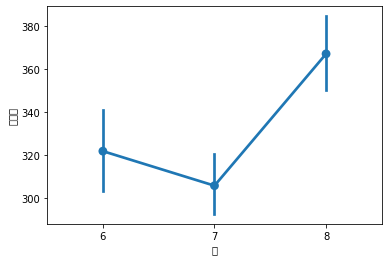

In [136]:
sns.pointplot(data=train,x="월",y="주문량")

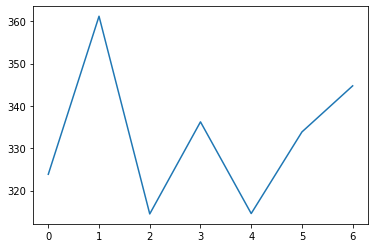

In [137]:
plt.plot(train.groupby("요일")["주문량"].sum()/train.groupby("요일")["주문량"].count())

In [138]:
(train.groupby("요일")["주문량"].sum()/train.groupby("요일")["주문량"].count()).describe()

count      7.000000
mean     332.715900
std       16.869934
min      314.504503
25%      319.230204
50%      333.862742
75%      340.498297
max      361.187054
Name: 주문량, dtype: float64

In [139]:
train['상품군'].value_counts()

living       1281
elec         1014
etc          1002
food          955
inner         878
cloth         818
furniture     461
life          430
bedding       282
beauty        216
health        176
Name: 상품군, dtype: int64

In [140]:
mother_grouped = train.groupby('마더코드')
MomCodeGroup = mother_grouped.sum()['주문량']

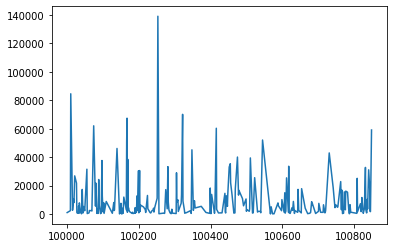

In [141]:
plt.plot(MomCodeGroup)

#노출시간대비 주문량 높은 놈들

In [142]:
MomCodeGroup2 = train.groupby(['마더코드']).sum()

In [143]:
MomCodeGroup2['주문량/노출'] = MomCodeGroup2['주문량']/MomCodeGroup2['노출(분)']
MomCodeGroup2.sort_values('주문량/노출', ascending=False).head()

,Unnamed: 0,노출(분),상품코드,판매단가,취급액,요일,시,주문량,holiday,월,holiday(includeSS),실제_서울_최고기온,실제_서울_최저기온,실제_서울_강수량(mm),실제_서울_평균풍속(m/s),실제_수원_최고기온,실제_수원_최저기온,실제_수원_강수량(mm),실제_수원_평균풍속(m/s),실제_파주_최고기온,실제_파주_최저기온,실제_파주_강수량(mm),실제_파주_평균풍속(m/s),예보_서울_강수확률,예보_서울_강수량,예보_서울_하늘상태,예보_서울_일최고기온,예보_서울_일최저기온,예보_일산_강수확률,예보_일산_강수량,예보_일산_일최고기온,예보_일산_일최저기온,예보_수원_강수확률,예보_수원_강수량,예보_수원_일최고기온,예보_수원_일최저기온,계절,DATE,미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),초미세먼지(㎍/㎥),MONTH,HOUR,주문량/노출
마더코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100492,75615,60.0,604461,149700,286104000,9,48,5733.547094,0,24,0,79.2,60.3,110.7,6.3,81.3,60.0,45.9,6.6,78.9,53.4,46.2,5.7,44.797297,2.763158,7.033784,82.578947,59.2500,28.175676,0.394737,80.526316,54.5625,40.135135,1.578947,82.578947,58.6875,6,60572487,83.88,60.24,0.10620,0.06084,1.500,0.01080,24,48,95.559118
100499,145080,120.0,1209006,239400,420256000,15,117,10532.731830,0,48,0,186.9,138.6,0.3,11.1,184.2,138.0,3.0,12.3,181.2,122.7,5.1,9.6,137.229730,6.907895,18.324324,183.315789,139.8750,120.000000,5.526316,177.000000,132.9375,133.986486,6.118421,180.473684,136.8750,12,121144908,136.44,83.28,0.19428,0.10164,2.532,0.02136,48,117,87.772765
100046,151203,60.0,1200756,185400,162001000,18,90,5242.750809,0,48,0,158.4,120.6,221.4,12.6,162.6,120.0,91.8,13.2,157.8,106.8,92.4,11.4,89.594595,5.526316,14.067568,165.157895,118.5000,56.351351,0.789474,161.052632,109.1250,80.270270,3.157895,165.157895,117.3750,12,121144974,167.76,120.48,0.21240,0.12168,3.000,0.02160,48,90,87.379180
100754,76092,60.0,606609,119700,187163000,15,39,4690.802005,0,24,3,86.7,55.5,0.0,5.4,83.1,52.2,0.0,5.1,83.1,46.5,0.0,2.7,66.689189,0.000000,9.668919,87.000000,60.9375,52.702703,0.000000,84.631579,54.1875,72.770270,0.394737,85.736842,59.2500,6,60572493,49.68,28.08,0.09552,0.05016,1.152,0.01020,24,39,78.180033
100323,151497,120.0,1208934,299400,452290000,21,99,9063.927856,0,48,3,177.3,126.3,0.0,11.4,171.3,120.3,0.0,10.2,170.4,107.4,0.0,6.6,142.297297,11.250000,18.729730,170.526316,124.6875,118.378378,12.631579,165.789474,114.9375,145.337838,11.447368,169.263158,122.0625,12,121144977,138.12,85.56,0.21396,0.11016,2.520,0.02136,48,99,75.532732


In [144]:
topcode = list(MomCodeGroup2.sort_values('주문량/노출', ascending=False).index[:50])

상품군내 마더코드별 주문량


In [145]:

multi_grouped = train.groupby(['상품군','마더코드'])
MultiGroup = multi_grouped['주문량'].sum()
MultiGroup = MultiGroup.reset_index()

In [146]:
item = list(set(MultiGroup['상품군']))

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_te

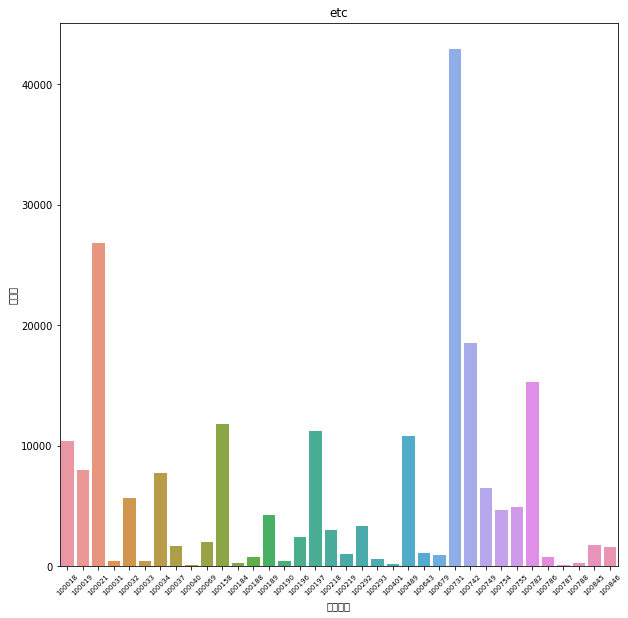

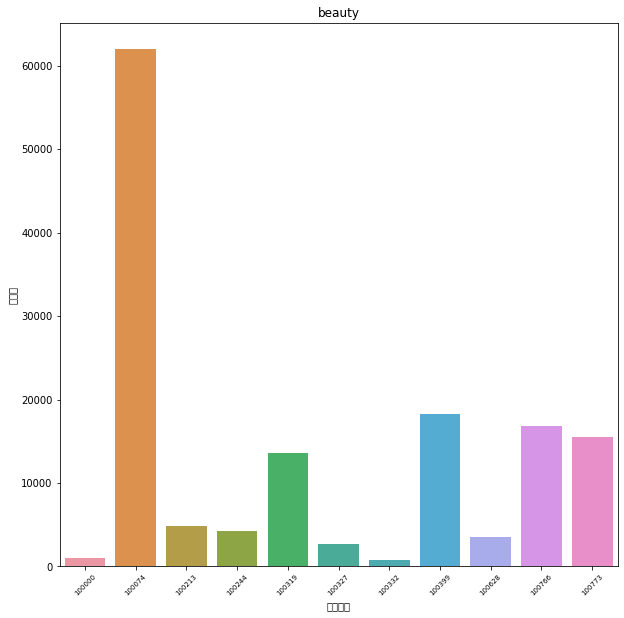

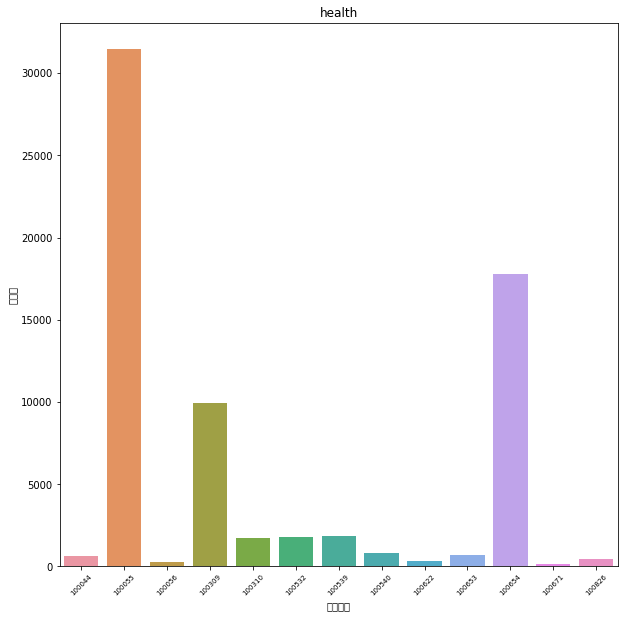

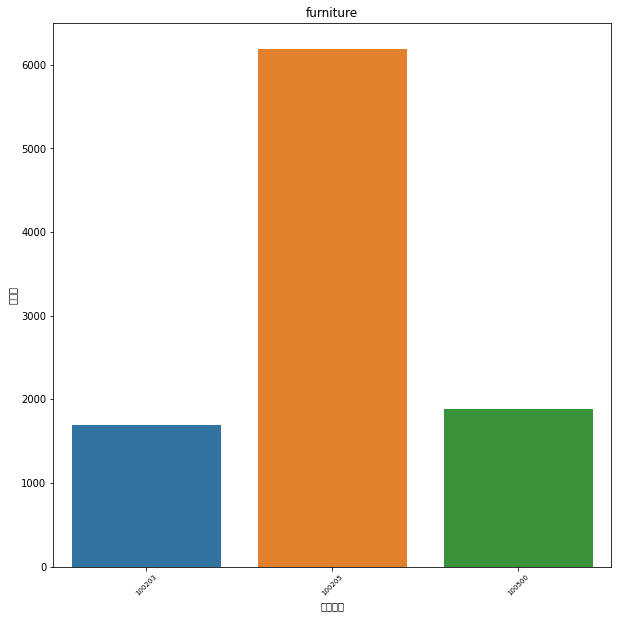

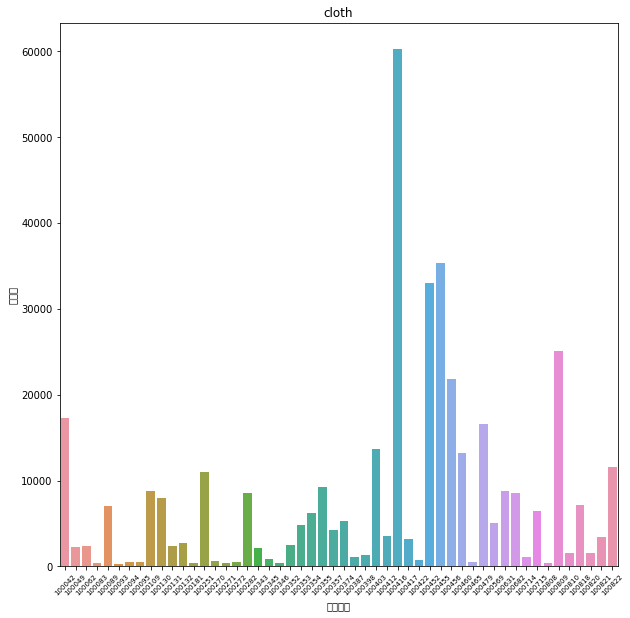

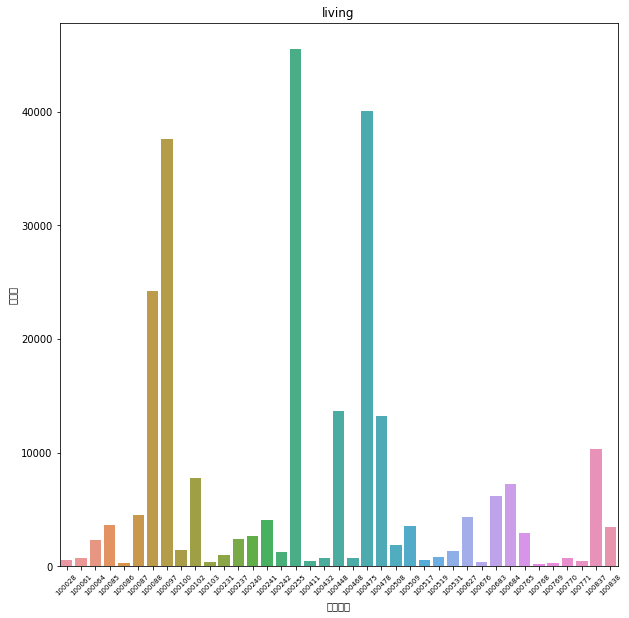

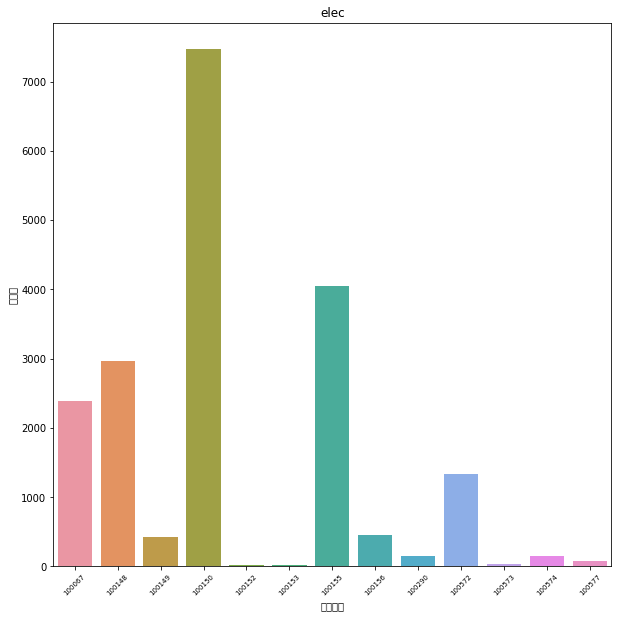

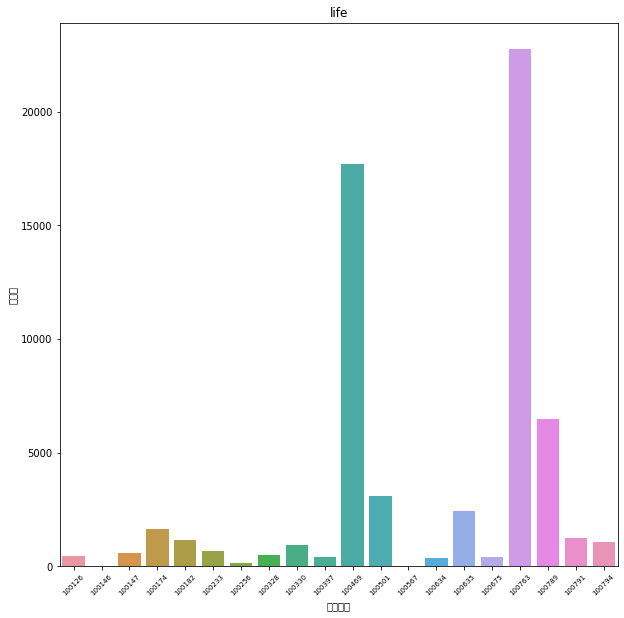

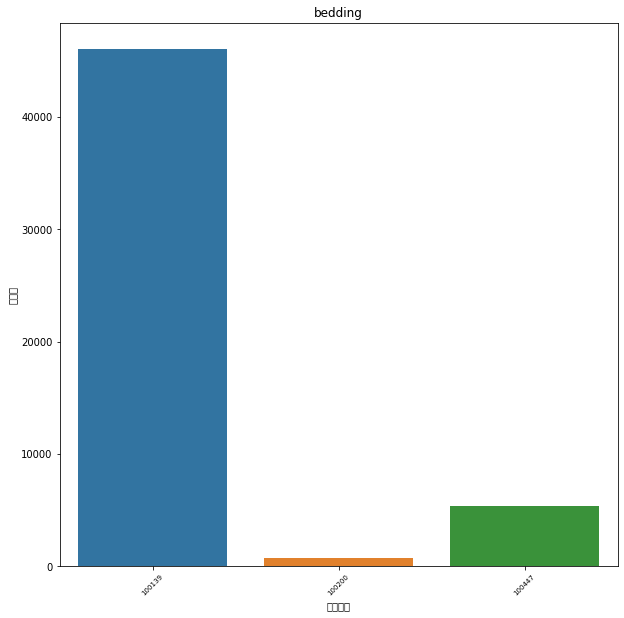

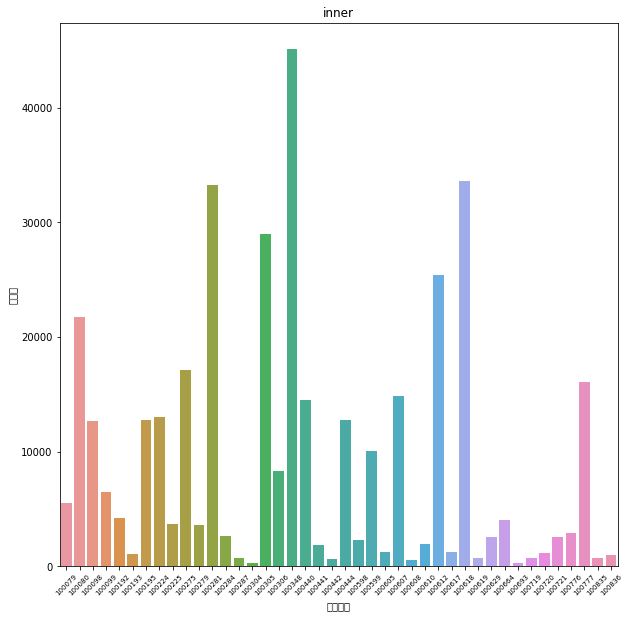

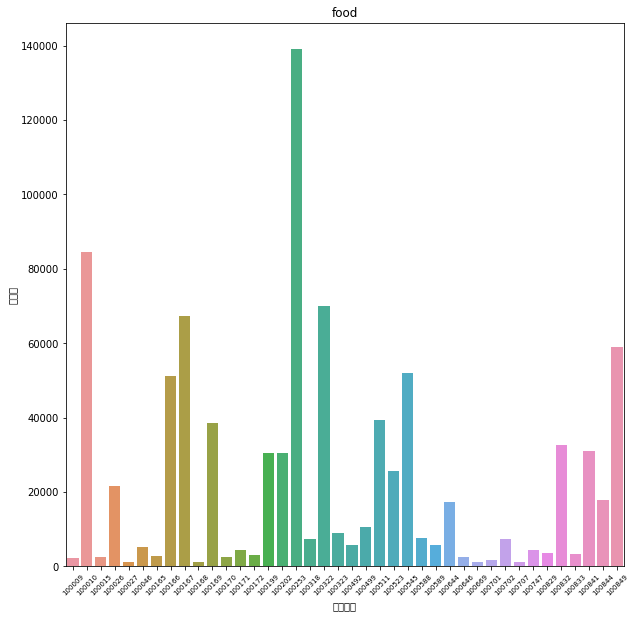

In [147]:
for i in item:
    plt.figure(figsize=(10,10))
    sns.barplot(data=MultiGroup[MultiGroup['상품군']==i], x='마더코드', y='주문량')
    plt.title(i)
    plt.xticks(rotation=45, size=7)

# 시간대별+상품군/마더코드별

In [148]:
hour_grouped = train.groupby(['시','상품군'])
HourGroup = hour_grouped['주문량'].sum()
HourGroup = HourGroup.reset_index()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_te

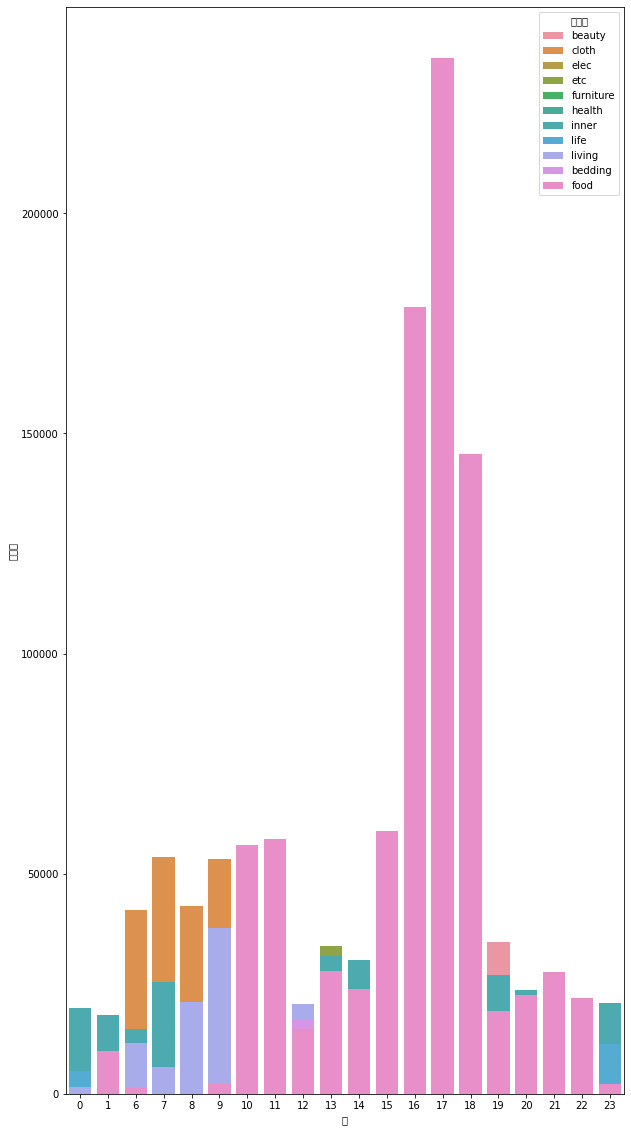

In [149]:
plt.figure(figsize=(10,20))
sns.barplot(data=HourGroup, x='시', y='주문량', hue='상품군', dodge=False)

#판매단가

In [150]:
np.corrcoef(train['주문량'],train['판매단가'])


array([[ 1.        , -0.39377501],
       [-0.39377501,  1.        ]])

In [151]:
np.corrcoef(train['주문량'],np.log(train['판매단가']))


array([[ 1.        , -0.61081947],
       [-0.61081947,  1.        ]])

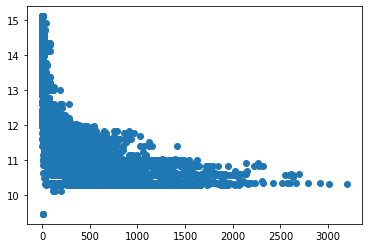

In [152]:
plt.scatter(train['주문량'], np.log(train['판매단가']))

# 모델 생성 및 훈련

In [187]:
watchdata = pd.read_excel('2019시청률데이터.xlsx',header=1)

In [188]:
watchdata

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,...,2019-11-23,2019-11-24,2019-11-25,2019-11-26,2019-11-27,2019-11-28,2019-11-29,2019-11-30,2019-12-01,2019-12-02,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-07,2019-12-08,2019-12-09,2019-12-10,2019-12-11,2019-12-12,2019-12-13,2019-12-14,2019-12-15,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-21,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.038,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.048,0.000,0.000,0.000,0.000,0.018,0.000,0.035,0.030,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003
1,02:01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.038,0.000,...,0.000,0.000,0.000,0.000,0.000,0.022,0.000,0.000,0.000,0.000,0.048,0.000,0.000,0.000,0.000,0.018,0.000,0.035,0.030,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.003
2,02:02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.038,0.000,...,0.000,0.000,0.000,0.000,0.000,0.022,0.000,0.000,0.000,0.000,0.033,0.000,0.000,0.000,0.000,0.018,0.018,0.035,0.067,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004
3,02:03,0.000,0.000,0.014,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.038,0.000,...,0.000,0.000,0.000,0.000,0.000,0.022,0.000,0.000,0.000,0.000,0.033,0.000,0.000,0.000,0.000,0.018,0.018,0.035,0.067,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.000,0.000,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
4,02:04,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.038,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.033,0.000,0.000,0.000,0.000,0.018,0.000,0.035,0.067,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.000,0.000,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,01:56,0.000,0.000,0.000,0.000,0.027,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.045,0.000,0.032,...,0.000,0.000,0.000,0.000,0.000,0.000,0.013,0.000,0.000,0.033,0.000,0.000,0.000,0.000,0.070,0.000,0.036

In [213]:
train_watch = watchdata.iloc[0:20,166:244].sum() # train에서 20분단위 시청률 합의 자료 (새벽2시~2시19분)
train_watch

2019-06-15    0.000
2019-06-16    0.000
2019-06-17    0.355
2019-06-18    0.000
2019-06-19    0.020
              ...  
2019-08-27    0.000
2019-08-28    0.040
2019-08-29    0.000
2019-08-30    0.000
2019-08-31    0.000
Length: 78, dtype: float64

In [212]:
(watchdata.iloc[0:20,166:244].sum()>0).sum() #78개중 31개만 20분단위 시청률이 0보다 큼

31

In [195]:
import datetime
i=0
while(i<1440):
  watchdata.iloc[i:i+20,1:-1].sum()

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,...,2019-11-23,2019-11-24,2019-11-25,2019-11-26,2019-11-27,2019-11-28,2019-11-29,2019-11-30,2019-12-01,2019-12-02,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-07,2019-12-08,2019-12-09,2019-12-10,2019-12-11,2019-12-12,2019-12-13,2019-12-14,2019-12-15,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-21,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.000,0.0,0.006,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.038,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.048,0.0,0.0,0.000,0.000,0.018,0.000,0.035,0.030,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.012,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.003
1,02:01,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.000,0.000,0.0,0.000,0.0,0.006,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.038,0.000,...,0.0,0.0,0.000,0.000,0.0,0.022,0.000,0.0,0.0,0.000,0.048,0.0,0.0,0.000,0.000,0.018,0.000,0.035,0.030,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.012,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.012,0.003
2,02:02,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.000,0.000,0.0,0.000,0.0,0.006,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.038,0.000,...,0.0,0.0,0.000,0.000,0.0,0.022,0.000,0.0,0.0,0.000,0.033,0.0,0.0,0.000,0.000,0.018,0.018,0.035,0.067,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.012,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.004
3,02:03,0.000,0.0,0.014,0.000,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.000,0.000,0.0,0.000,0.0,0.006,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.038,0.000,...,0.0,0.0,0.000,0.000,0.0,0.022,0.000,0.0,0.0,0.000,0.033,0.0,0.0,0.000,0.000,0.018,0.018,0.035,0.067,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.012,0.0,0.0,0.0,0.000,0.017,0.0,0.000,0.0,0.0,0.0,0.000,0.004
4,02:04,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.000,0.000,0.0,0.000,0.0,0.006,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.038,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.012,0.033,0.0,0.0,0.000,0.000,0.018,0.000,0.035,0.067,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.012,0.0,0.0,0.0,0.000,0.017,0.0,0.000,0.0,0.0,0.0,0.000,0.004
5,02:05,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.000,0.000,0.0,0.015,0.0,0.006,0.0,0.0,0.000,0.0,0.0,0.0,0.005,0.000,0.0,0.000,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.038,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.012,0.033,0.0,0.0,0.000,0.000,0.018,0.000,0.035,0.030,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.012,0.0,0.0,0.0,0.000,0.017,0.0,0.000,0.0,0.0,0.0,0.000,0.004
6,02:06,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.000,0.000,0.0,0.015,0.0,0.006,0.0,0.0,0.000,0.0,0.0,0.0,0.005,0.034,0.0,0.000,0.0,0.0,0.01,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.038,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.033,0.0,0.0,0.000,0.024,0.018,0.000,0.035,0.030,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.012,0.0,0.0,0.0,0.000,0.017,0.0,0.000,0.0,0.0,0.0,0.000,0.003
7,02:07,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.000,0.000,0.0,0.015,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.034,0.0,0.000,0.0,0.0,0.01,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.038,0.000,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.033,0.0,0.0,0.000,0.024,0.018,0.000,0.035,0.030,0.016,0.0,0.0,0.

In [216]:
watch_day = watchdata.iloc[:,:-1].sum() #매일매일 모든 시간대에 대한 시청률 합계
watch_day

시간대           02:0002:0102:0202:0302:0402:0502:0602:0702:080...
2019-01-01                                                5.304
2019-01-02                                                8.018
2019-01-03                                                2.494
2019-01-04                                                 3.83
                                    ...                        
2019-12-27                                                5.589
2019-12-28                                                8.816
2019-12-29                                                6.451
2019-12-30                                                6.594
2019-12-31                                                7.076
Length: 366, dtype: object

In [225]:
train_watch

2019-06-15    0.000
2019-06-16    0.000
2019-06-17    0.355
2019-06-18    0.000
2019-06-19    0.020
              ...  
2019-08-27    0.000
2019-08-28    0.040
2019-08-29    0.000
2019-08-30    0.000
2019-08-31    0.000
Length: 78, dtype: float64

In [233]:
hi = train.groupby(['DATE']).mean()['주문량']
hi

array([170.03304588, 350.11871747, 310.30230492, 398.49808793,
       263.10526879, 331.52802113, 326.12490975, 301.40104677,
       291.05580036, 385.17482066, 411.2926084 , 382.75360464,
       334.24810552, 370.83424774, 318.32851292, 314.13585659,
       329.64800869, 257.25342504, 283.01795094, 353.18342036,
       328.12248763, 328.86714516, 364.85738044, 281.37679895,
       314.06052813, 277.55915208, 221.72994752, 294.20372732,
       341.12828094, 226.0638888 , 260.67321551, 398.36232273,
       196.35323778, 285.99391499, 260.71040486, 298.67291604,
       372.50429094, 246.12081293, 268.20810134, 270.62185669,
       341.59773624, 309.2690907 , 302.71060203, 502.84555057,
       400.66036828, 347.83313198, 362.98528398, 284.9782702 ,
       329.77235998, 321.86822609, 285.14255744, 318.10026961,
       462.10906716, 307.10166618, 378.60795794, 267.76174621,
       369.40775079, 398.62252929, 300.47818678, 333.01262182,
       265.85721746, 378.60374457, 275.91514541, 367.20

In [236]:
stats.linregress(train_watch,hi)

LinregressResult(slope=5.460845951098516, intercept=339.99135026856163, rvalue=0.011350976534093761, pvalue=0.9214290858948913, stderr=55.18129944617935)

In [234]:
hello = pd.DataFrame()
hello['a'] = train_watch
hello['b'] = hi.values
hello

,a,b
2019-06-15,0.000,170.033046
2019-06-16,0.000,350.118717
2019-06-17,0.355,310.302305
2019-06-18,0.000,398.498088
2019-06-19,0.020,263.105269
...,...,...
2019-08-27,0.000,522.956852
2019-08-28,0.040,530.107926
2019-08-29,0.000,657.764898
2019-08-30,0.000,504.389351


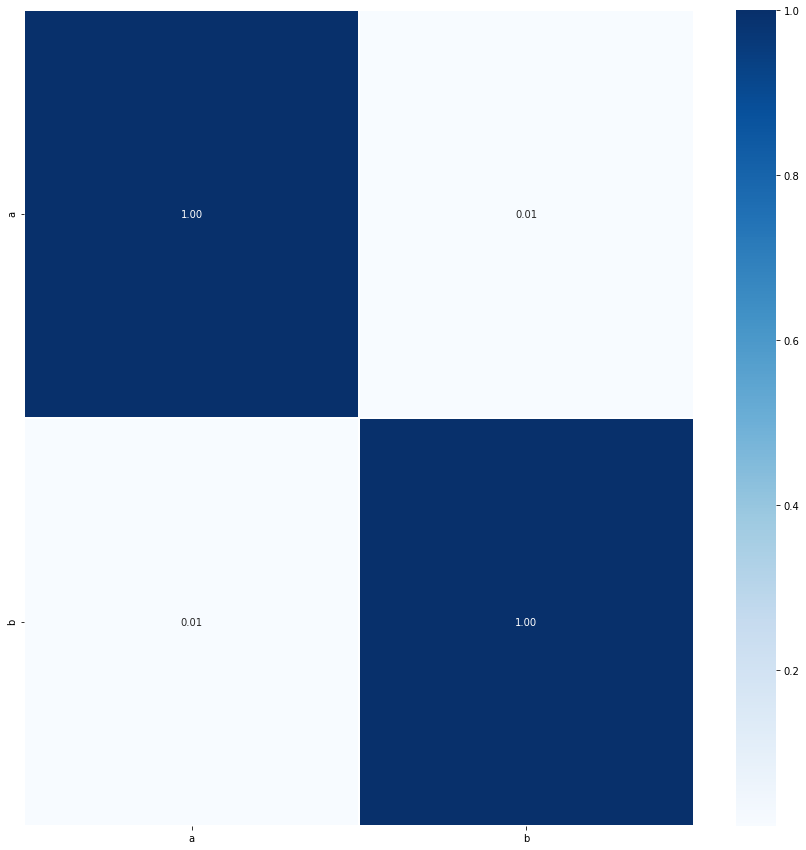

In [235]:
plt.figure(figsize=(15,15))
sns.heatmap(data = hello.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')